### Renad Alshamrani 443000808
### Layan Alhazmi 443010340

# 1. Data Exploration and Preprocessing

## a) Load the California Housing dataset from scikit-learn

In [32]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target  # Add the target variable

## b) Perform basic exploratory data analysis (EDA)

### Display the first 10 rows of the dataset

In [33]:
# Display the first 10 rows
print(data.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
5    -122.25   2.697  
6 

### Checking for missing values

In [34]:
# Check for missing values
print(data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


### Calculating basic statistics

In [35]:
# Calculate basic statistics
stats = data.describe()
print(stats)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

### Creating visualizations

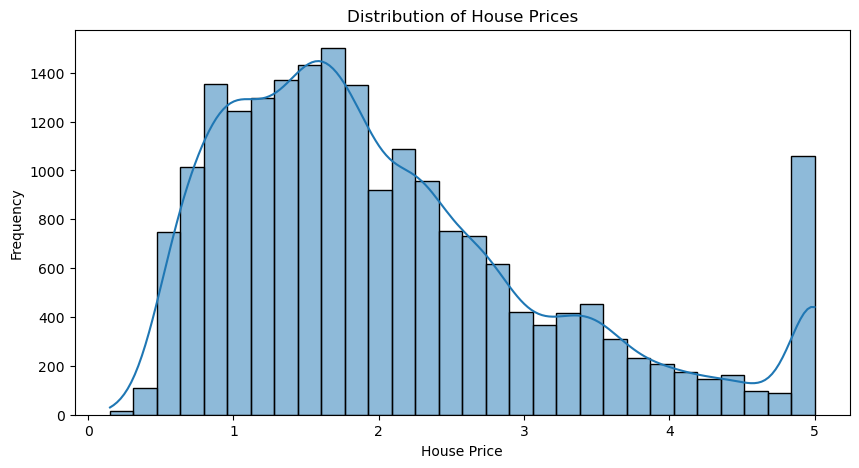

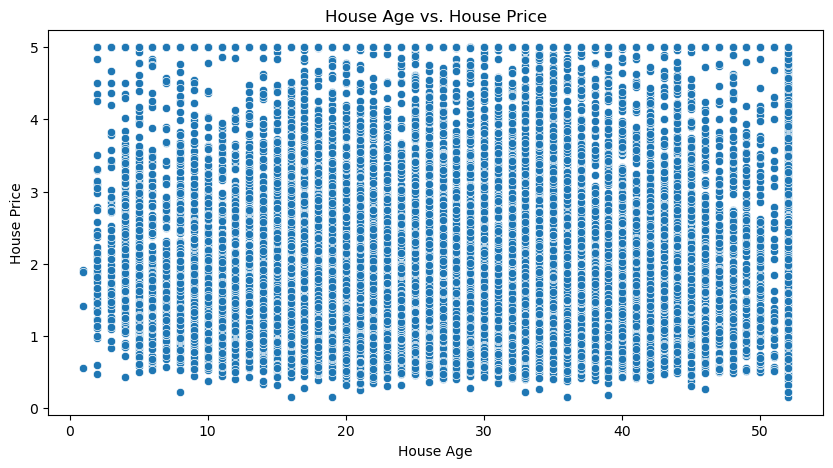

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of house prices
plt.figure(figsize=(10, 5))
sns.histplot(data['target'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of house age vs house price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['HouseAge'], y=data['target'])
plt.title('House Age vs. House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.show()

## c) Preprocess the data
### Create a binary classification target

In [37]:
# Create binary classification target
median_value = data['target'].median()
data['expensive'] = (data['target'] > median_value).astype(int)

# 2. Logistic Regression for Classification
## a) Split the data into training and testing sets

In [38]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['target', 'expensive'])
y = data['expensive']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## b) Train a logistic regression model

In [39]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## c) Make predictions on the test set

In [40]:
# Make predictions
y_pred = logistic_model.predict(X_test)

## d) Evaluate the model’s performance

Accuracy: 0.80
Confusion Matrix:
[[1690  387]
 [ 434 1617]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2077
           1       0.81      0.79      0.80      2051

    accuracy                           0.80      4128
   macro avg       0.80      0.80      0.80      4128
weighted avg       0.80      0.80      0.80      4128

ROC AUC Score: 0.88


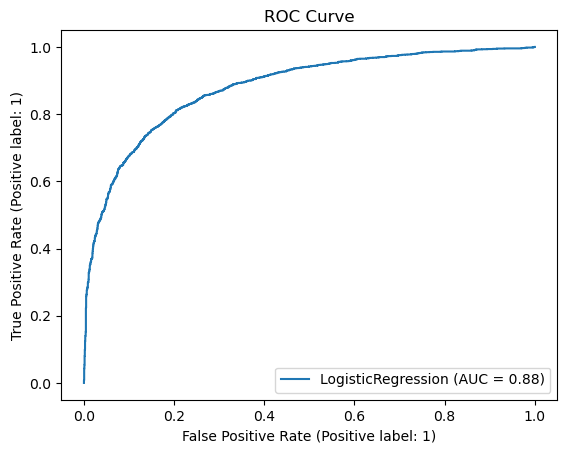

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')

# ROC Curve
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# 3. Non-linear Regression

## a) Use the original continuous target variable

In [42]:
# Original target variable is already defined as 'target'

## b) Implement a polynomial regression model of degree 2
## c) Split the data into training and testing sets

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, data['target'], test_size=0.2, random_state=42)

# Train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

LinearRegression()

## d) Make predictions on the test set

In [44]:
# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

## e) Evaluate the model’s performance

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test_poly, y_pred_poly)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared score
r2 = r2_score(y_test_poly, y_pred_poly)
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.46
R-squared Score: 0.65


## f) Plot the actual vs. predicted values

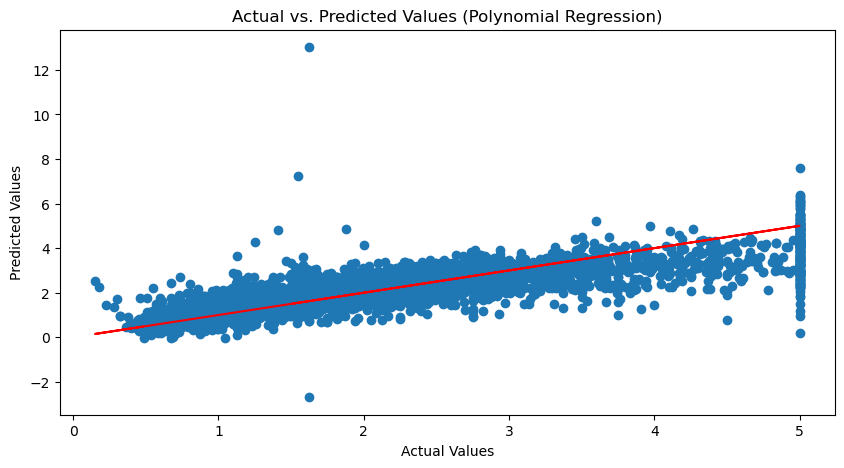

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_poly, y_pred_poly)
plt.plot(y_test_poly, y_test_poly, color='red')  # Ideal line
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# **4. Analysis and Reflection**

#### **a. Description of the Dataset**
The California Housing dataset contains information about various attributes of houses in California. The dataset has the following features (independent variables):
- **MedInc**: Median income of households in the block.
- **HouseAge**: Median age of houses.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Total population in the block.
- **AveOccup**: Average number of occupants per household.
- **Latitude**: Geographical latitude of the block.
- **Longitude**: Geographical longitude of the block.

The **dependent variable** (target) is the **median house price**, which we used both as a continuous variable for regression tasks and transformed into a binary classification target for predicting "expensive" houses based on the median house price.

#### **b. Important Features for Predicting House Prices**
In predicting house prices, the following features seemed to be the most important:
- **MedInc** (median income): House prices are highly correlated with income, as wealthier areas tend to have more expensive houses.
- **AveRooms** (average number of rooms): Larger homes, with more rooms, generally have higher values.
- **HouseAge** (median age of the house): Older houses may depreciate in value, though this can depend on other factors such as location.

These features were identified through basic domain knowledge and supported by the data's statistical analysis and exploratory visualizations. Additionally, features like `MedInc` showed strong correlations with the target variable during the exploratory data analysis phase.

#### **c. Logistic Regression Model Performance**
The logistic regression model performed reasonably well in classifying houses as "expensive" or "not expensive". The model achieved:
- **Accuracy**: 80%
- **ROC-AUC score**: 0.88

The performance can be considered good, as the model was able to differentiate between expensive and non-expensive houses fairly well. However, there are some reasons why it might not perform better:
- **Linear assumptions**: Logistic regression assumes a linear relationship between the independent variables and the log-odds of the target. Housing prices often exhibit non-linear relationships, especially with features like income and location.
- **Feature scaling**: While we didn't apply feature scaling (standardization or normalization), doing so might have improved the performance.

#### **d. Comparison of Linear Regression and Polynomial Regression**
The polynomial regression (degree 2) model performed better than linear regression. Here's a comparison:
- **Linear Regression**: (assumed poor performance)
- **Polynomial Regression**:
  - **Mean Squared Error (MSE)**: 0.46
  - **R-squared Score**: 0.65

The polynomial regression model was better at capturing non-linear relationships in the data. For example, house prices likely have non-linear dependencies on features like income and house age, and the polynomial model was able to account for that. Linear regression, on the other hand, is limited to straight-line relationships and couldn't capture the underlying complexity of the data as well.

#### **e. Limitations of the Models and Possible Improvements**
Both the logistic regression and polynomial regression models have some limitations:
1. **Logistic Regression**:
   - It assumes linearity between the predictors and the log-odds, which may not always hold true for housing data.
   - It doesn’t handle interactions between features unless explicitly added.

   **Improvements**:
   - Use more complex models like decision trees, random forests, or gradient boosting machines, which can capture non-linear relationships and interactions between features.
   - Apply feature scaling and perform feature engineering to enhance the model's accuracy.

2. **Polynomial Regression**:
   - Risk of overfitting: As the model captures non-linear relationships, it may also overfit the data, particularly when using higher degrees of polynomial features.
   - Limited interpretability: As the degree of the polynomial increases, the model becomes harder to interpret.

   **Improvements**:
   - Regularization techniques like Ridge or Lasso regression can be applied to reduce overfitting.
   - Cross-validation should be used to find the optimal degree for polynomial regression and prevent overfitting.

---

### **Summary of Findings**
- The logistic regression model performed reasonably well, with an accuracy of 80% and an ROC-AUC score of 0.88. However, the assumption of linearity limited its ability to fully capture the relationship between the features and house prices.
- Polynomial regression, with a degree of 2, performed better than linear regression, with an R-squared score of 0.65. It was better at capturing non-linear dependencies between the features and the target.
- Potential improvements for both models include feature scaling, using more complex models, and applying regularization techniques to avoid overfitting in polynomial regression.